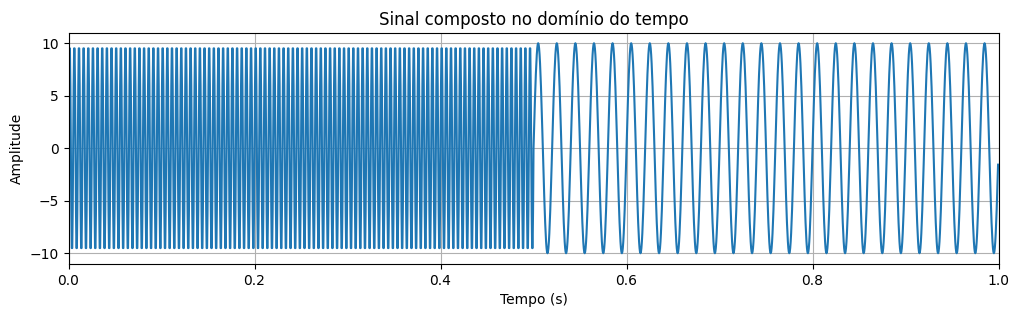

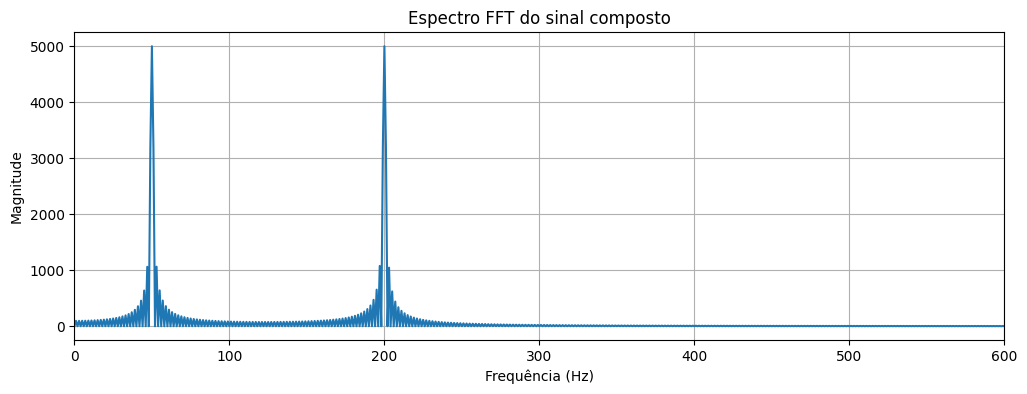

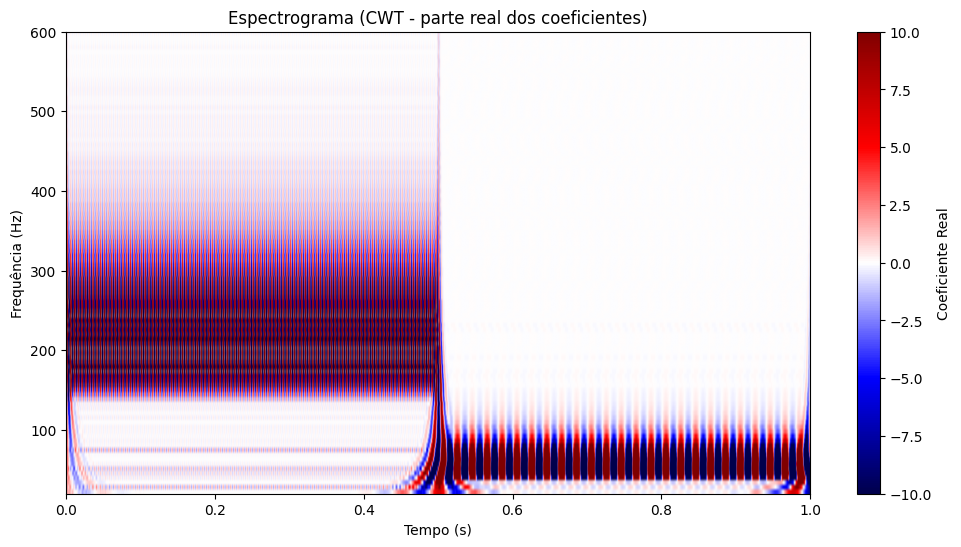

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Parâmetros do sinal
fs = 2000           # Frequência de amostragem (Hz)
t_total = 1.0       # duração total (s)
N = int(fs * t_total)
t = np.linspace(0, t_total, N, endpoint=False)

# Frequências dos sinais
f_baixa = 50        # 50 Hz
f_alta = 200        # 500 Hz

# Ponto de troca entre sinais
x = int(N / 2)

# Criar sinais e multiplicar por amplitude maior
amplitude = 10
sinal_alta = amplitude * np.sin(2 * np.pi * f_alta * t[:x])
sinal_baixa = amplitude * np.sin(2 * np.pi * f_baixa * t[x:])
sinal = np.concatenate((sinal_alta, sinal_baixa))

# Plot do sinal original no tempo
plt.figure(figsize=(12, 3))
plt.plot(t, sinal)
plt.title("Sinal composto no domínio do tempo")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, t_total)
plt.show()

# FFT
fft_vals = np.fft.fft(sinal)
freqs = np.fft.fftfreq(len(sinal), 1/fs)
idx_positivo = freqs >= 0
freqs_pos = freqs[idx_positivo]
fft_magnitude = np.abs(fft_vals[idx_positivo])

plt.figure(figsize=(12, 4))
plt.plot(freqs_pos, fft_magnitude)
plt.title("Espectro FFT do sinal composto")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(0, 600)
plt.show()

# CWT com PyWavelets (Morlet)
frequencias = np.linspace(20, 600, 100)
wavelet_central_freq = pywt.central_frequency('morl')
escalas = wavelet_central_freq * fs / frequencias

coeficientes, escalas = pywt.cwt(sinal, escalas, 'morl', sampling_period=1/fs)

# Plot do espectrograma mostrando a parte real dos coeficientes
plt.figure(figsize=(12, 6))
plt.imshow(coeficientes.real, extent=[0, t_total, frequencias[0], frequencias[-1]],
           cmap='seismic', aspect='auto', origin='lower', vmin=-amplitude, vmax=amplitude)
plt.title("Espectrograma (CWT - parte real dos coeficientes)")
plt.xlabel("Tempo (s)")
plt.ylabel("Frequência (Hz)")
plt.colorbar(label='Coeficiente Real')
plt.show()


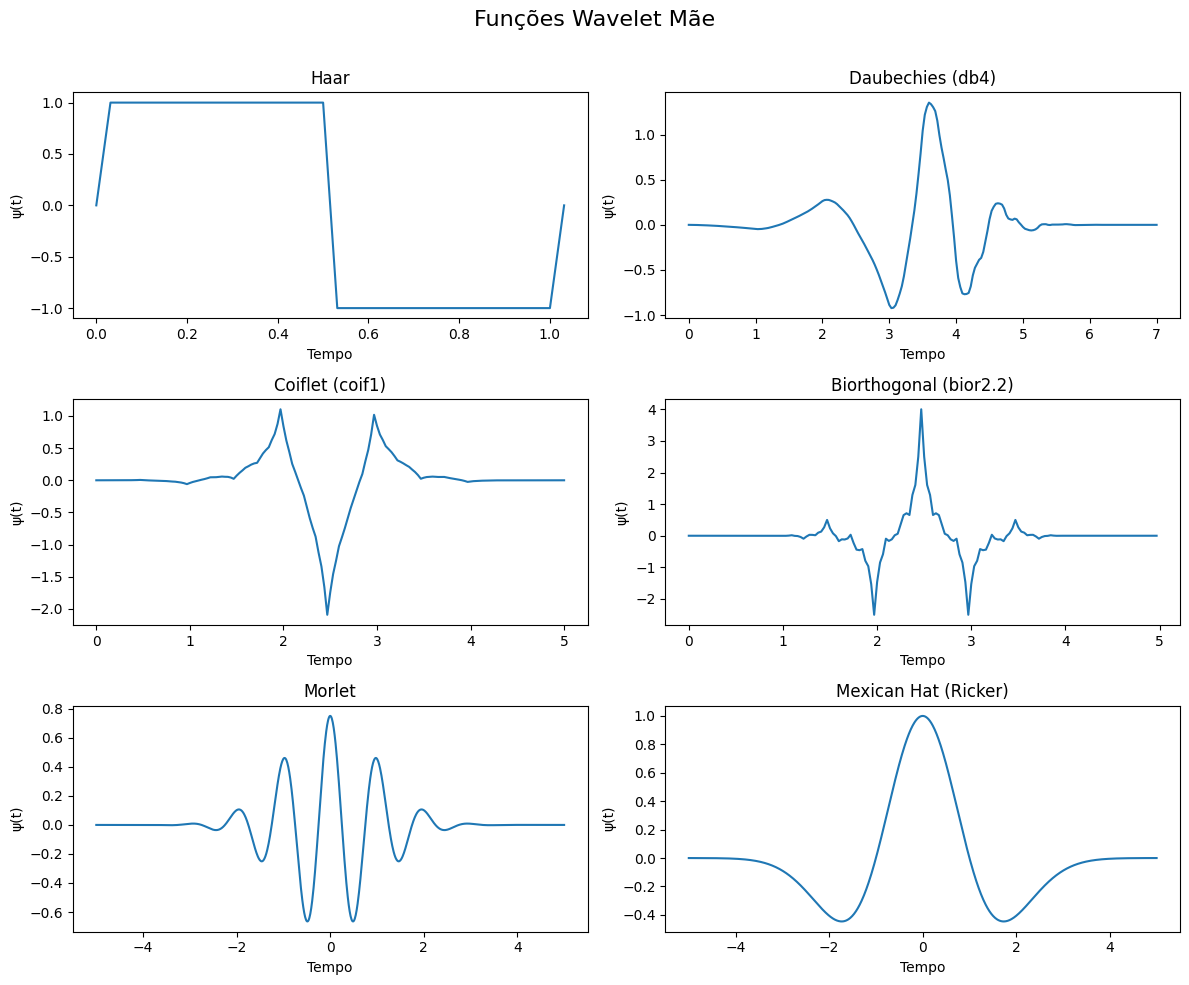

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Tempo comum para Morlet e Mexican Hat
t = np.linspace(-5, 5, 1000)

# Morlet (manual)
def morlet_wave(t, fb=1, fc=1):
    return (np.pi**(-0.25)) * np.exp(1j * 2 * np.pi * fc * t) * np.exp(-t**2 / (2 * fb**2))

# Mexican Hat
def mexican_hat(t):
    return (1 - t**2) * np.exp(-t**2 / 2)

plt.figure(figsize=(12, 10))

# === Haar ===
wavelet = pywt.Wavelet('haar')
phi, psi, x = wavelet.wavefun(level=5)
plt.subplot(3,2,1)
plt.plot(x, psi)
plt.title("Haar")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

# === Daubechies (db4) ===
wavelet = pywt.Wavelet('db4')
phi, psi, x = wavelet.wavefun(level=5)
plt.subplot(3,2,2)
plt.plot(x, psi)
plt.title("Daubechies (db4)")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

# === Coiflet (coif1) ===
wavelet = pywt.Wavelet('coif1')
phi, psi, x = wavelet.wavefun(level=5)
plt.subplot(3,2,3)
plt.plot(x, psi)
plt.title("Coiflet (coif1)")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

# === Biorthogonal (bior2.2) ===
wavelet = pywt.Wavelet('bior2.2')
res = wavelet.wavefun(level=5)
if len(res) == 5:
    psi = res[1]  # psi_d
    x = res[4]
else:
    psi = res[1]
    x = res[2]
plt.subplot(3,2,4)
plt.plot(x, psi)
plt.title("Biorthogonal (bior2.2)")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

# === Morlet ===
morlet = morlet_wave(t)
plt.subplot(3,2,5)
plt.plot(t, np.real(morlet))
plt.title("Morlet")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

# === Mexican Hat ===
mexhat = mexican_hat(t)
plt.subplot(3,2,6)
plt.plot(t, mexhat)
plt.title("Mexican Hat (Ricker)")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

plt.suptitle("Funções Wavelet Mãe", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

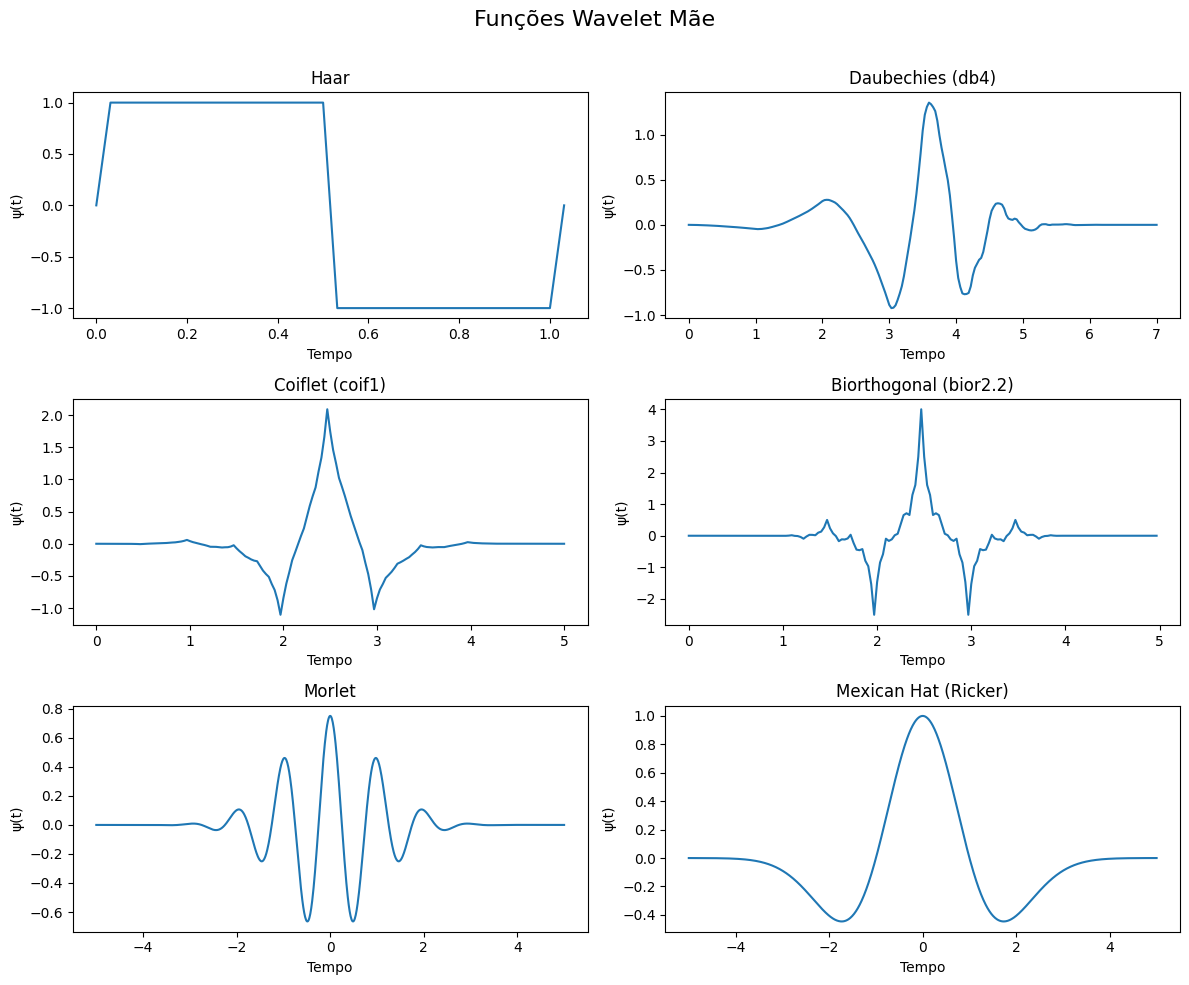

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Tempo comum para Morlet e Mexican Hat
t = np.linspace(-5, 5, 1000)

# Morlet (manual)
def morlet_wave(t, fb=1, fc=1):
    return (np.pi**(-0.25)) * np.exp(1j * 2 * np.pi * fc * t) * np.exp(-t**2 / (2 * fb**2))

# Mexican Hat
def mexican_hat(t):
    return (1 - t**2) * np.exp(-t**2 / 2)

plt.figure(figsize=(12, 10))

# === Haar ===
wavelet = pywt.Wavelet('haar')
phi, psi, x = wavelet.wavefun(level=5)
plt.subplot(3,2,1)
plt.plot(x, psi)
plt.title("Haar")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

# === Daubechies (db4) ===
wavelet = pywt.Wavelet('db4')
phi, psi, x = wavelet.wavefun(level=5)
plt.subplot(3,2,2)
plt.plot(x, psi)
plt.title("Daubechies (db4)")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

# === Coiflet (coif1) ===
wavelet = pywt.Wavelet('coif1')
phi, psi, x = wavelet.wavefun(level=5)
plt.subplot(3,2,3)
plt.plot(x, -psi)  # inversão visual para parecer com fontes tradicionais
plt.title("Coiflet (coif1)")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

# === Biorthogonal (bior2.2) ===
wavelet = pywt.Wavelet('bior2.2')
res = wavelet.wavefun(level=5)
if len(res) == 5:
    psi = res[1]  # psi_d
    x = res[4]
else:
    psi = res[1]
    x = res[2]
plt.subplot(3,2,4)
plt.plot(x, psi)
plt.title("Biorthogonal (bior2.2)")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

# === Morlet ===
morlet = morlet_wave(t)
plt.subplot(3,2,5)
plt.plot(t, np.real(morlet))
plt.title("Morlet")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

# === Mexican Hat ===
mexhat = mexican_hat(t)
plt.subplot(3,2,6)
plt.plot(t, mexhat)
plt.title("Mexican Hat (Ricker)")
plt.xlabel("Tempo"); plt.ylabel("ψ(t)")

plt.suptitle("Funções Wavelet Mãe", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
